In [1]:
cat = 'death'

In [2]:
# load libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import time
import os
#from pysal.esda.mapclassify import Quantiles, Equal_Interval
# Import libraries
import geopandas
import json
from datetime import datetime

from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, NumeralTickFormatter
from bokeh.palettes import brewer

from bokeh.io.doc import curdoc
from bokeh.models import Slider, HoverTool, Select
from bokeh.layouts import widgetbox, row, column

In [3]:
# Read the geojson map file for Realtor Neighborhoods into a GeoDataframe object
usa = geopandas.read_file('cb_2018_us_state_20m/cb_2018_us_state_20m.shp')
usa = usa.drop(columns = ["STATEFP","STATENS","AFFGEOID","GEOID","LSAD","ALAND","AWATER"])
usa = usa.rename({'STUSPS': 'state'}, axis='columns')
usa = usa.loc[~usa['NAME'].isin(['Alaska','Hawaii','Puerto Rico'])]
usa.head()

state          NAME                                           geometry
0    MD      Maryland  MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ...
1    IA          Iowa  POLYGON ((-96.62187 42.77925, -96.57794 42.827...
2    DE      Delaware  POLYGON ((-75.77379 39.72220, -75.75323 39.757...
3    OH          Ohio  MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ...
4    PA  Pennsylvania  POLYGON ((-80.51989 40.90666, -80.51964 40.987...

In [4]:
df2 = pd.read_csv("us_states_covid19_daily.csv") #

#Calculating the date as the days since the first outbreak was recorded .
df2["DateTime"] = pd.to_datetime(df2['date'], format='%Y%m%d', errors='ignore')
d0 = datetime(2020, 1, 22)
df2['DayNumber'] = df2.apply(lambda x : (x["DateTime"]-d0).days, axis=1)
df2 = df2.drop(columns=['DateTime'])
df_positive = pd.DataFrame(df2[["DayNumber","state",cat]])

In [5]:
df_positive['DayNumber'] = df_positive.apply(lambda x : str(x['DayNumber']), axis=1)
df_positive = df_positive.fillna(0)

In [6]:
df_positive

DayNumber state  death
0           94    AK    9.0
1           94    AL  212.0
2           94    AR   47.0
3           94    AS    0.0
4           94    AZ  266.0
...        ...   ...    ...
2876         4    WA    0.0
2877         3    WA    0.0
2878         2    WA    0.0
2879         1    WA    0.0
2880         0    WA    0.0

[2881 rows x 3 columns]

In [7]:
df_positive = df_positive.pivot_table(index=['state'], columns='DayNumber', values=cat).reset_index()
#df_positive = df_positive.drop(['DayNumber'], axis=0)

In [8]:
#df_positive.iloc[]

In [9]:
# Merge the GeoDataframe object (usa) with the df_map summary data (neighborhood)
merged = pd.merge(usa, df_positive, on='state', how='left')

In [10]:
merged.head()

state          NAME                                           geometry   0  \
0    MD      Maryland  MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ... NaN   
1    IA          Iowa  POLYGON ((-96.62187 42.77925, -96.57794 42.827... NaN   
2    DE      Delaware  POLYGON ((-75.77379 39.72220, -75.75323 39.757... NaN   
3    OH          Ohio  MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ... NaN   
4    PA  Pennsylvania  POLYGON ((-80.51989 40.90666, -80.51964 40.987... NaN   

    1  10  11  12  13  14  ...     86     87      88      89   9      90  \
0 NaN NaN NaN NaN NaN NaN  ...  425.0  463.0   486.0   516.0 NaN   584.0   
1 NaN NaN NaN NaN NaN NaN  ...   64.0   74.0    75.0    79.0 NaN    83.0   
2 NaN NaN NaN NaN NaN NaN  ...   61.0   61.0    67.0    72.0 NaN    82.0   
3 NaN NaN NaN NaN NaN NaN  ...  418.0  451.0   471.0   509.0 NaN   557.0   
4 NaN NaN NaN NaN NaN NaN  ...  756.0  836.0  1112.0  1204.0 NaN  1564.0   

       91      92      93      94  
0   631.0   748.0   798.0   875.0  
1    90.0    96.0   107.0   112.0  
2    89.0    92.0   100.0   112.0  
3   610.0   656.0   690.0   711.0  
4  1622.0  1421.0  1492.0  1537.0  

[5 rows x 98 columns]

In [11]:
merged[merged['NAME'] == 'New York']

state      NAME                                           geometry   0   1  \
20    NY  New York  MULTIPOLYGON (((-72.01893 41.27411, -71.92680 ... NaN NaN   

    10  11  12  13  14  ...       86       87       88       89   9       90  \
20 NaN NaN NaN NaN NaN  ...  12822.0  13362.0  13869.0  14347.0 NaN  14828.0   

         91       92       93       94  
20  15302.0  15740.0  16162.0  16599.0  

[1 rows x 98 columns]

In [29]:
list_of_days = []
for i in range(25,95):
    list_of_days.append(str(i))

25


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


26


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


27


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


28


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


29


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


30


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


31


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


32


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


33


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


34


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


35


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


36


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


37


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


38


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


39


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


40


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


41


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


42


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


43


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


44


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


45


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


46


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


47


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


48


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


49


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


50


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


51


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


52


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


53


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


54


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


55


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


56


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


57


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


58


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


59


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


60


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


61


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


62


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


63


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


64


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


65


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


66


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


67


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


68


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


69


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


70


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


71


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


72


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


73


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


74


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


75


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


76


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


77


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


78


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


79


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


80


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


81


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


82


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


83


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


84


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


85


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


86


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


87


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


88


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


89


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


90


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


91


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


92


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


93


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


94


/Users/trond/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


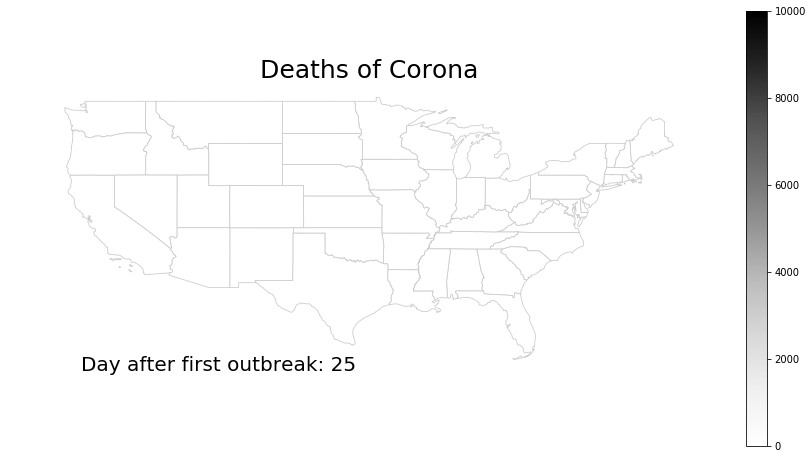

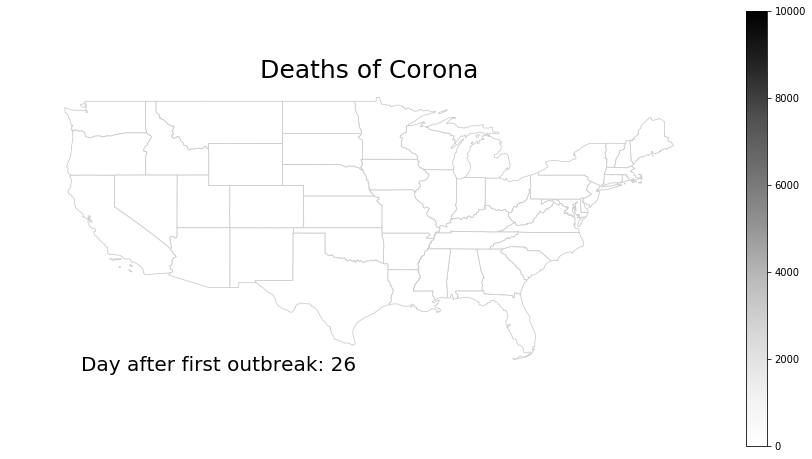

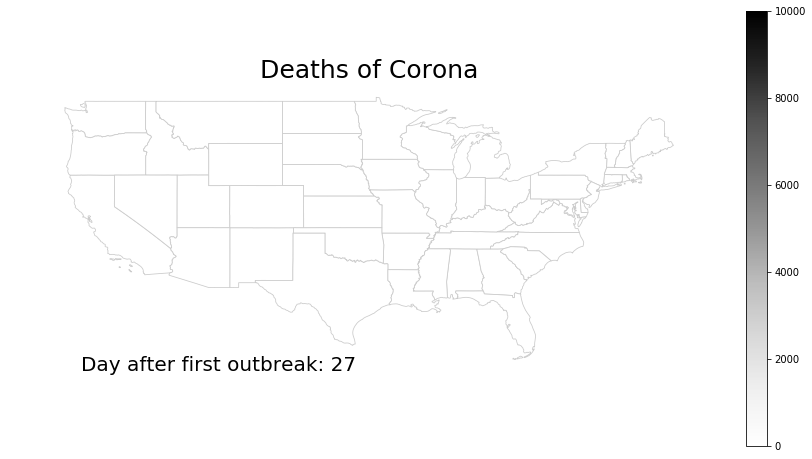

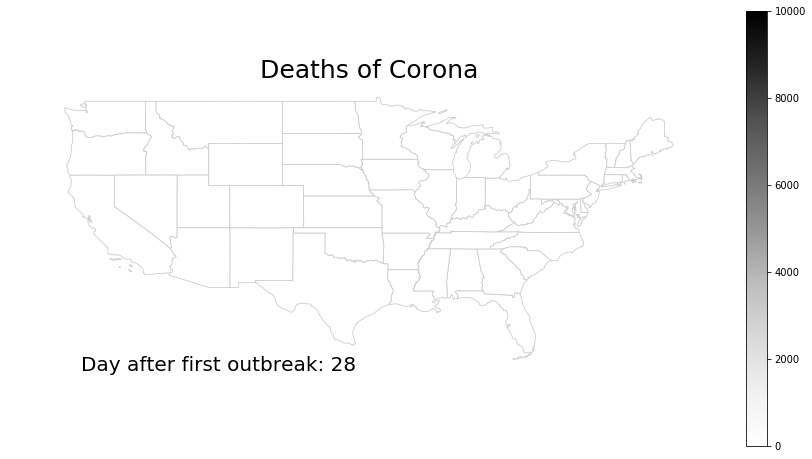

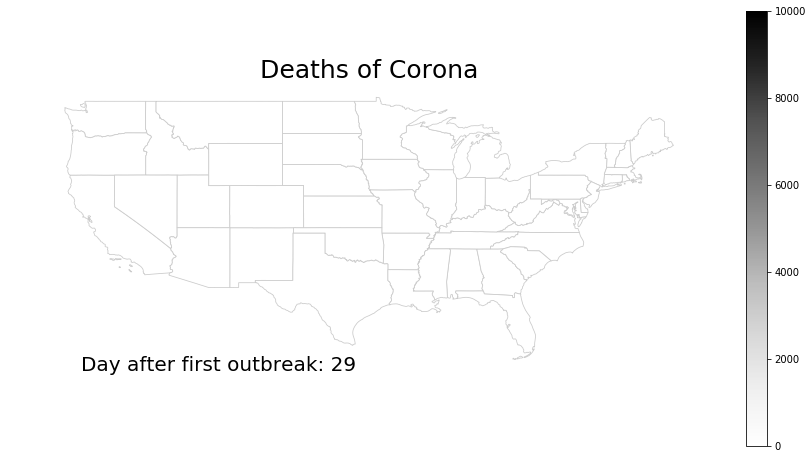

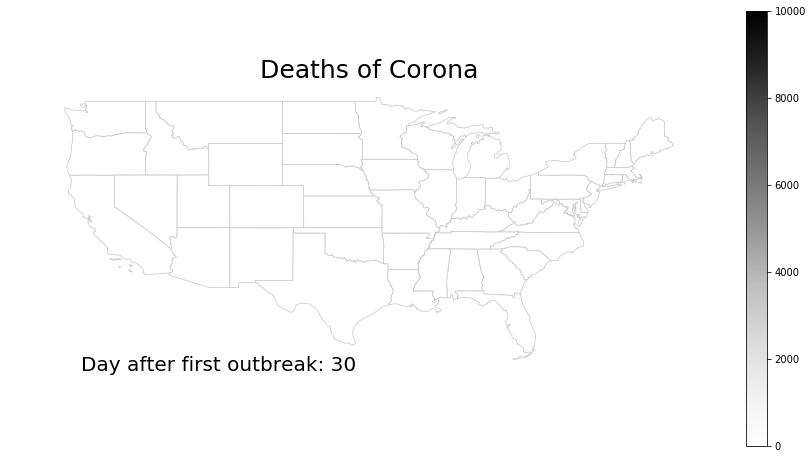

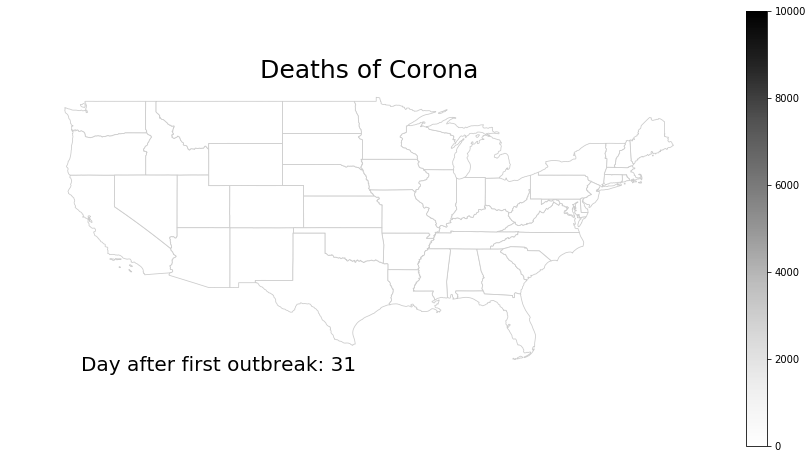

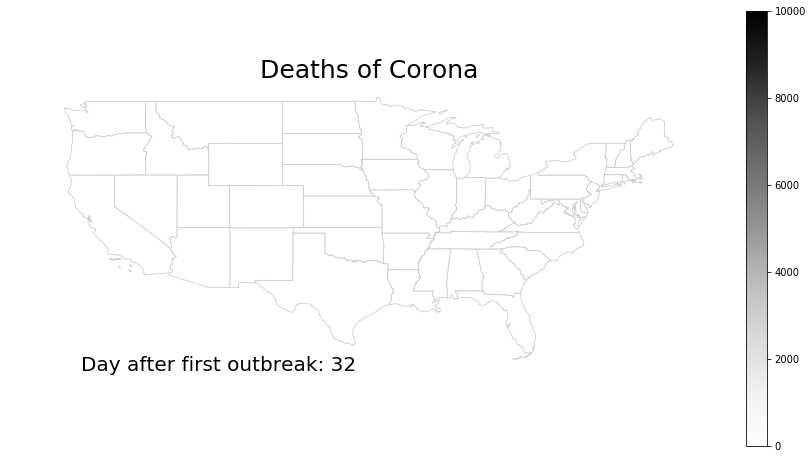

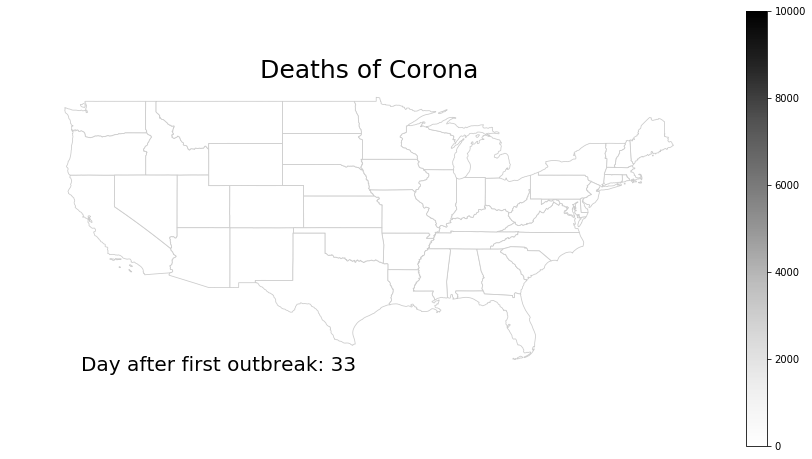

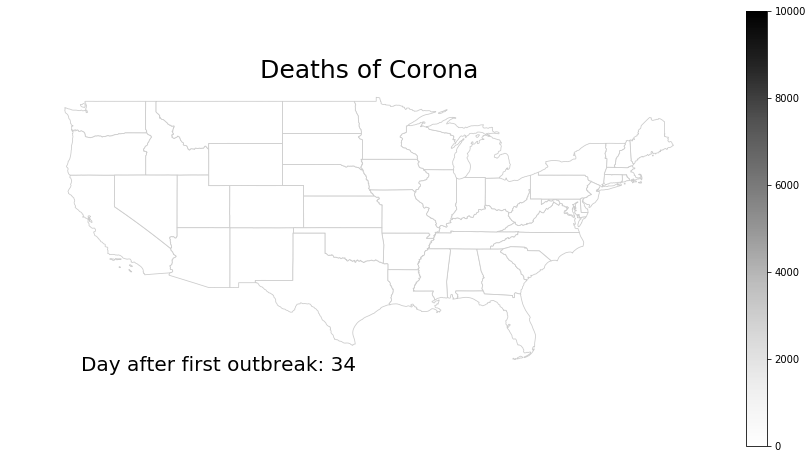

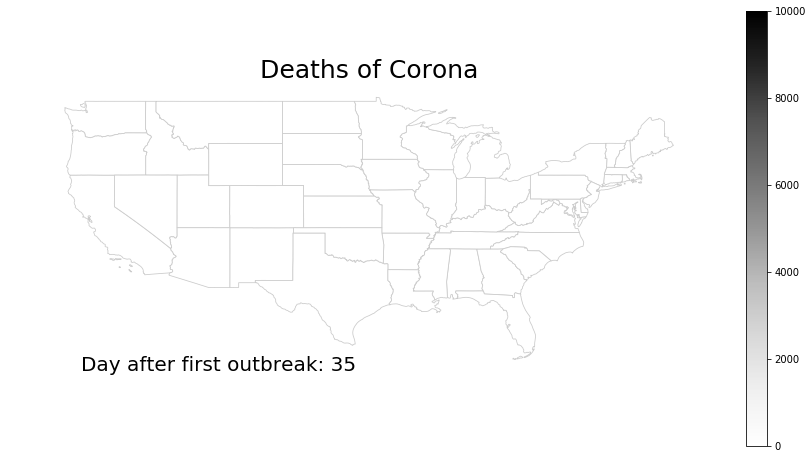

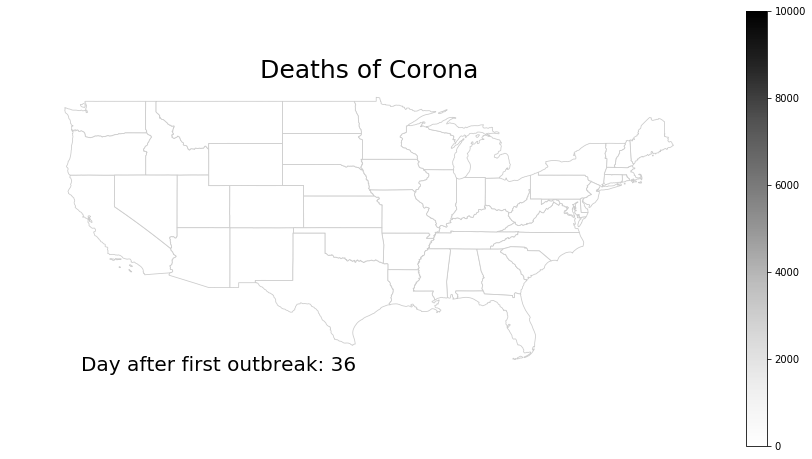

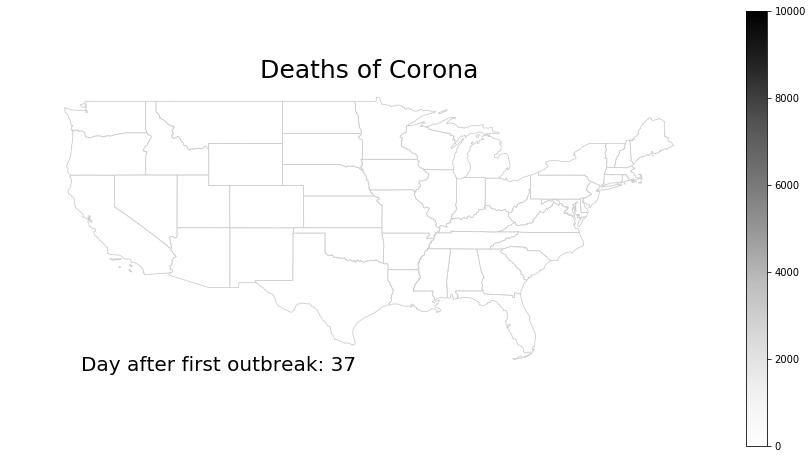

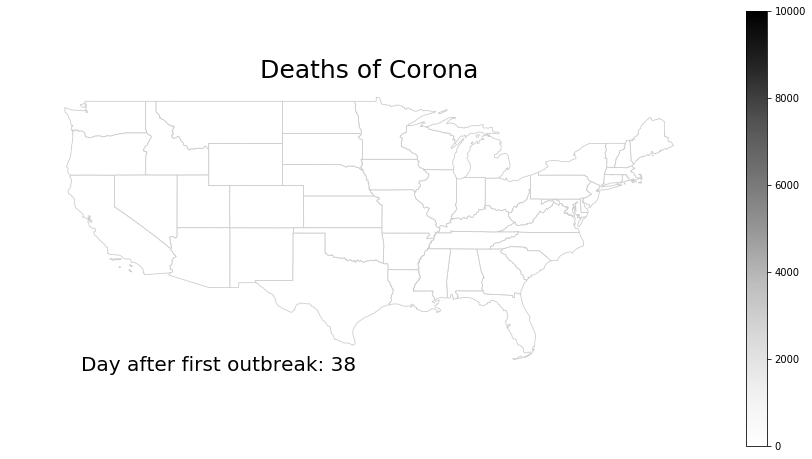

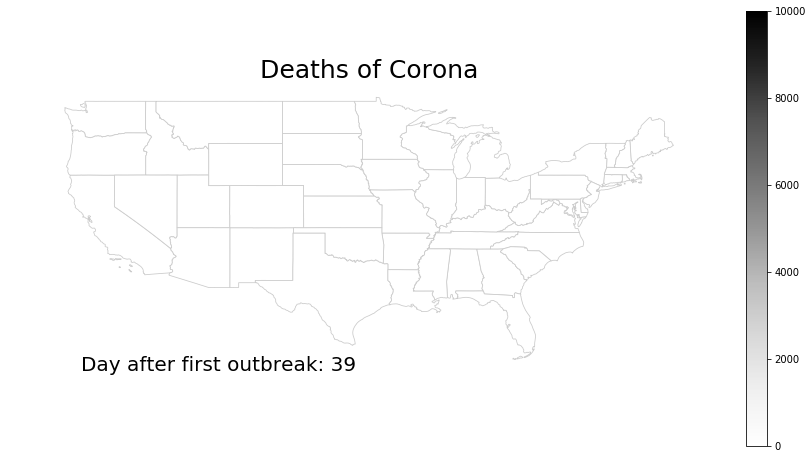

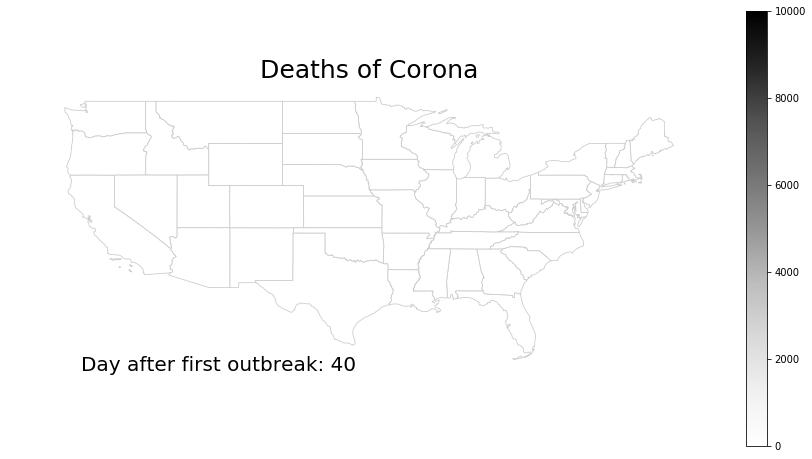

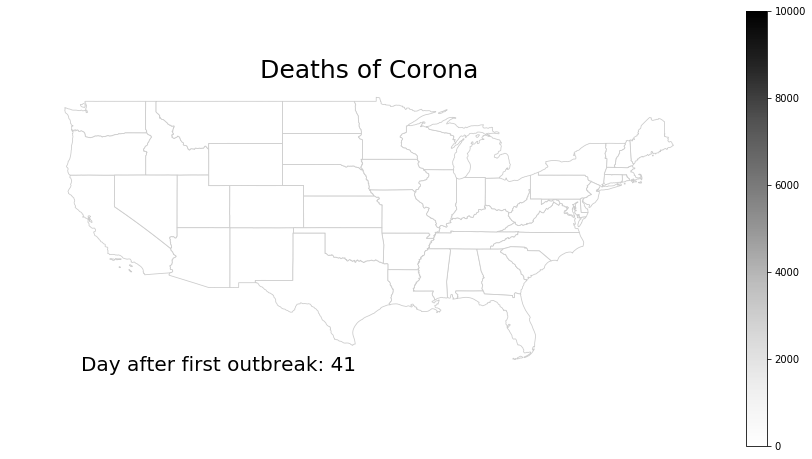

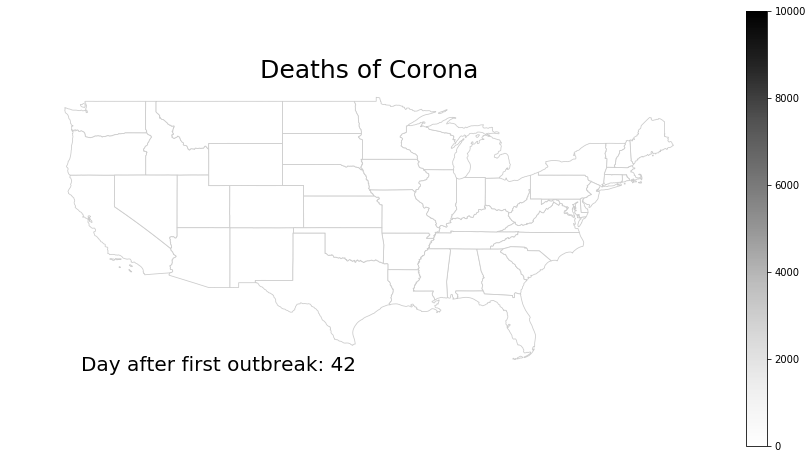

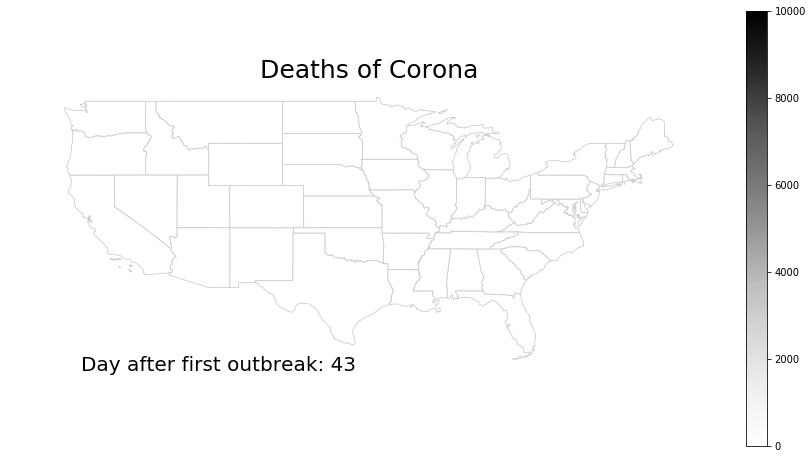

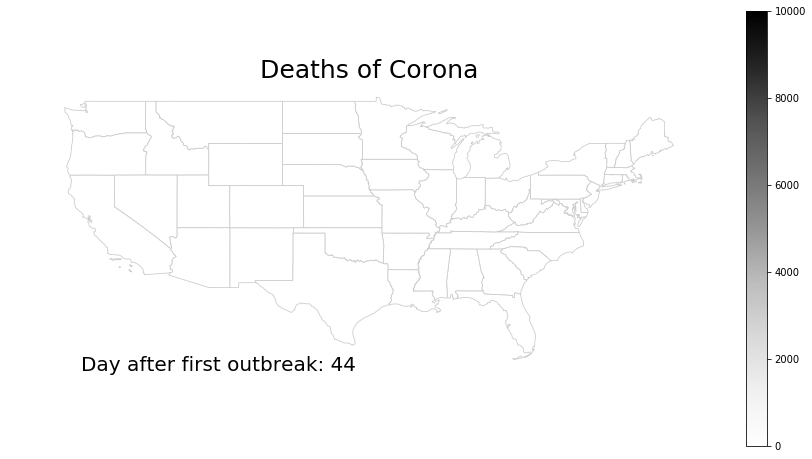

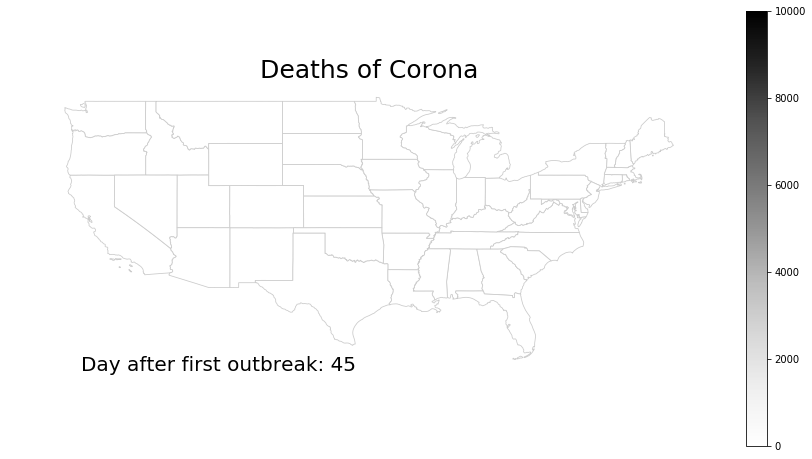

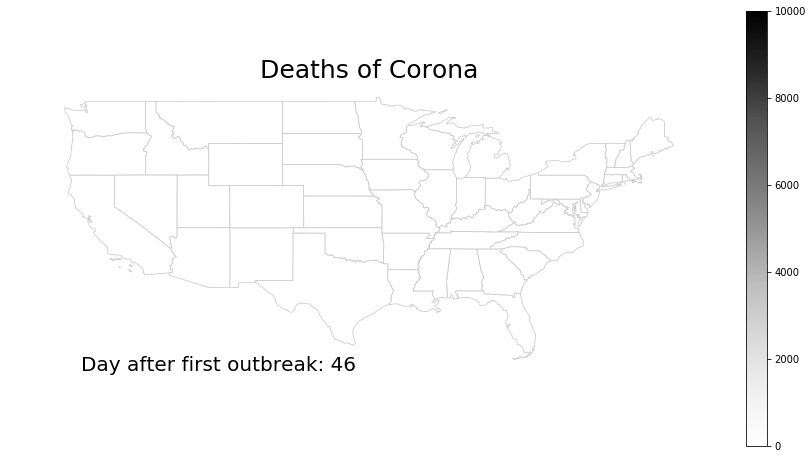

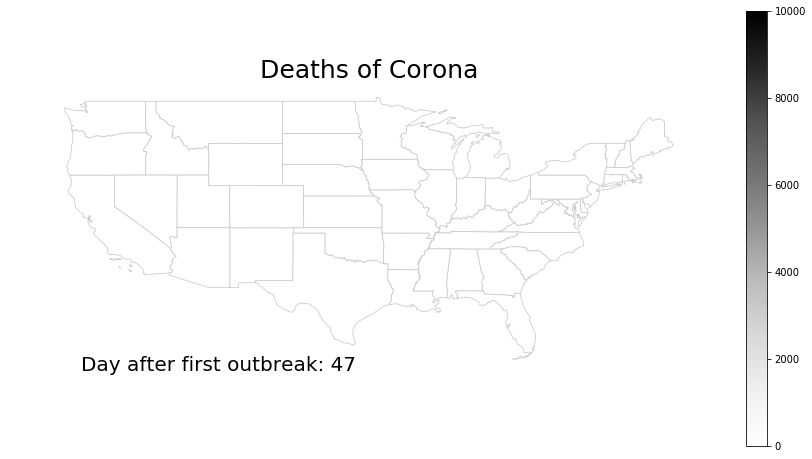

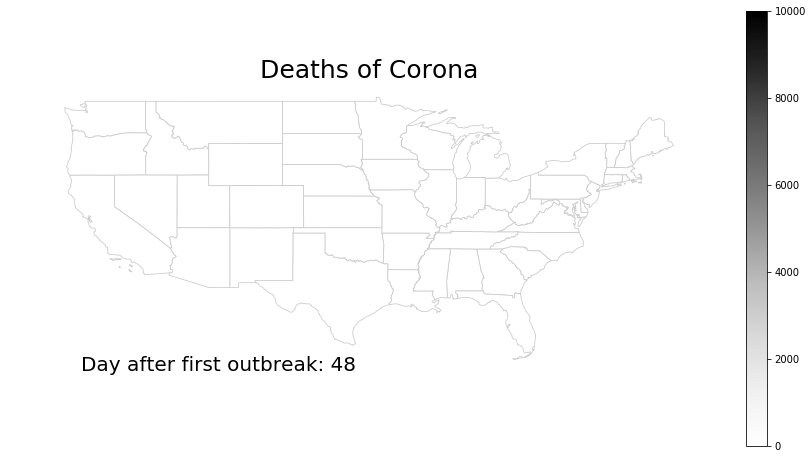

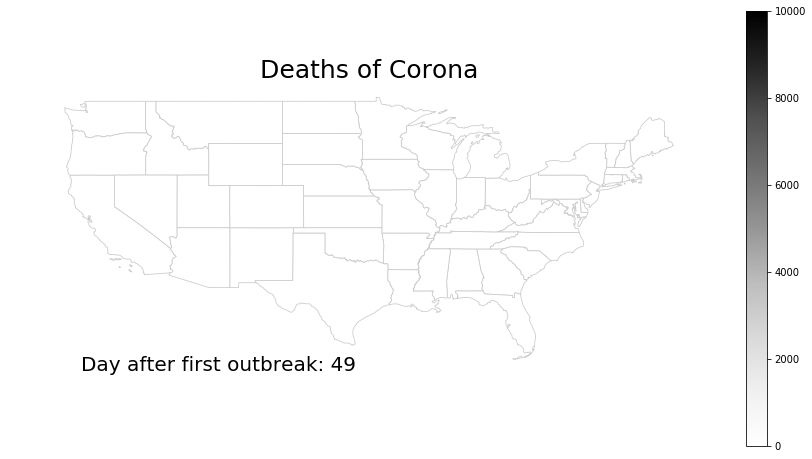

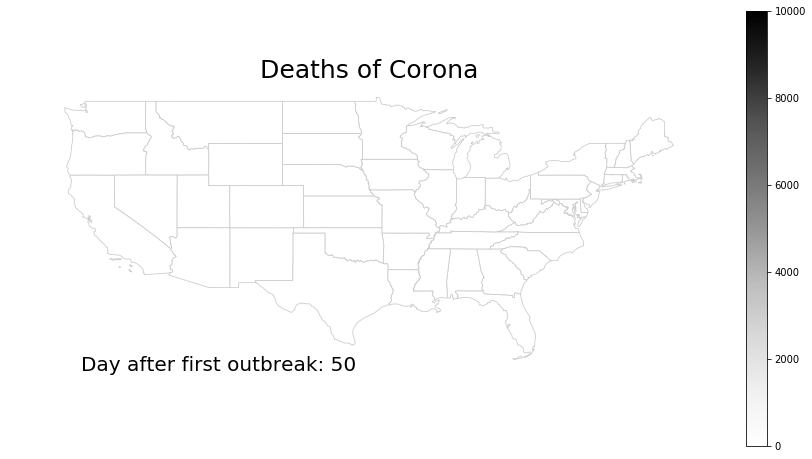

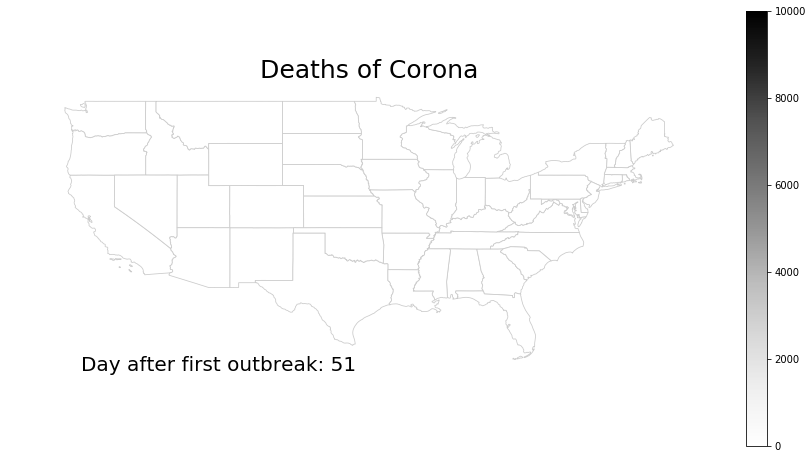

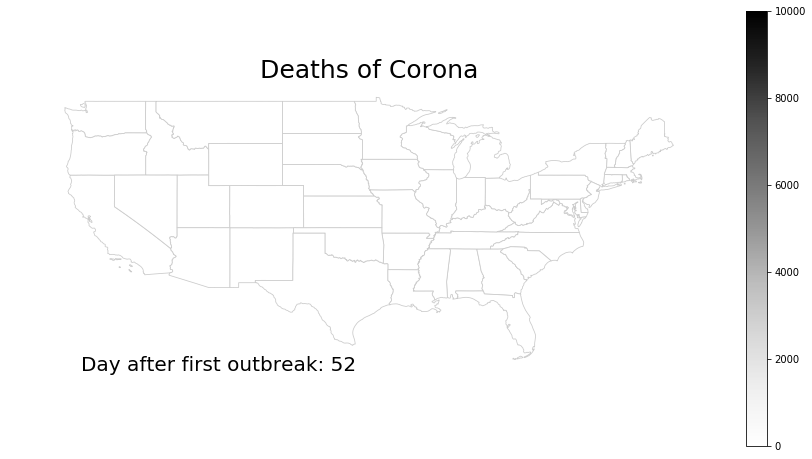

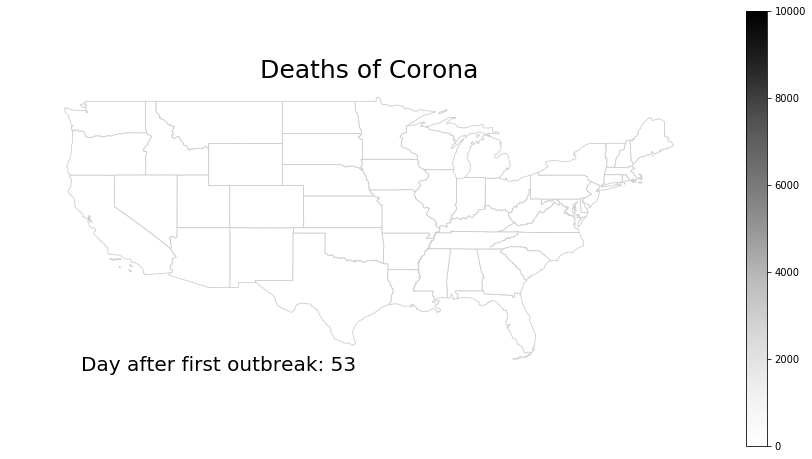

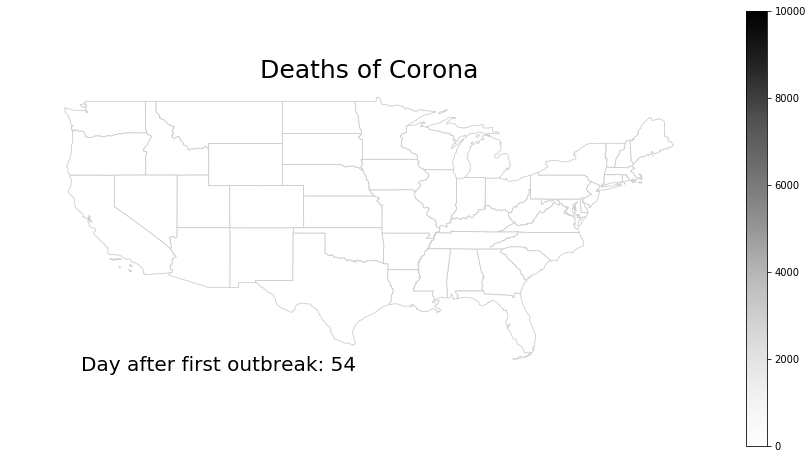

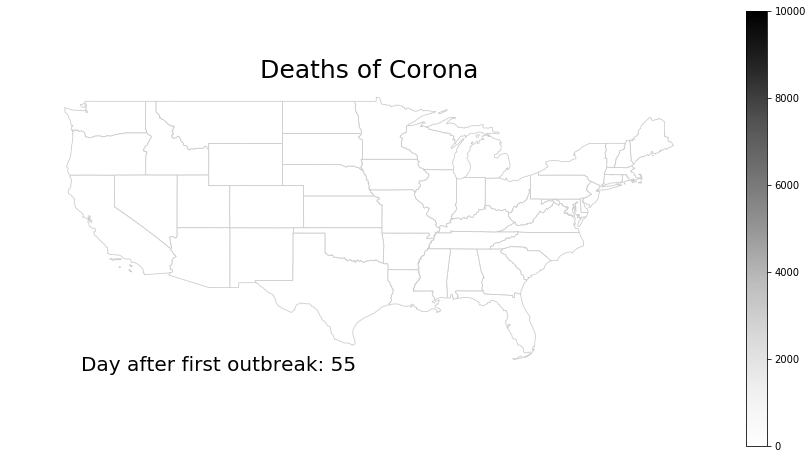

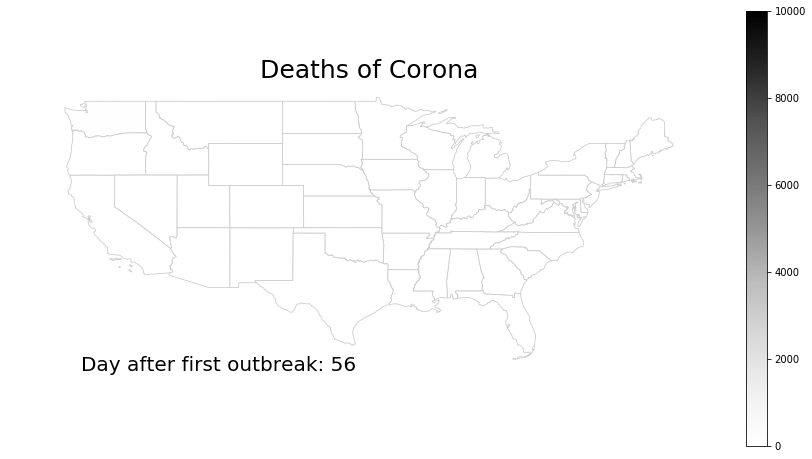

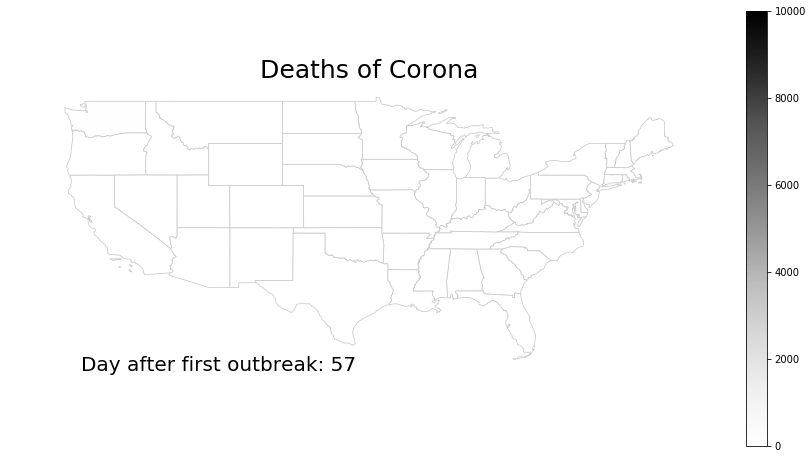

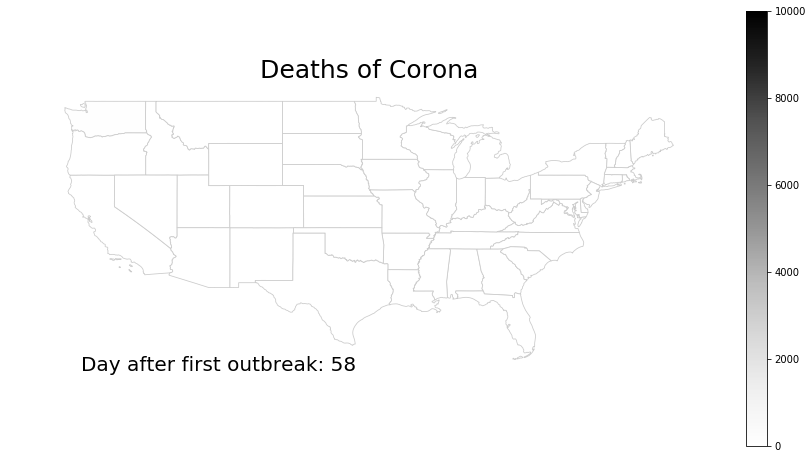

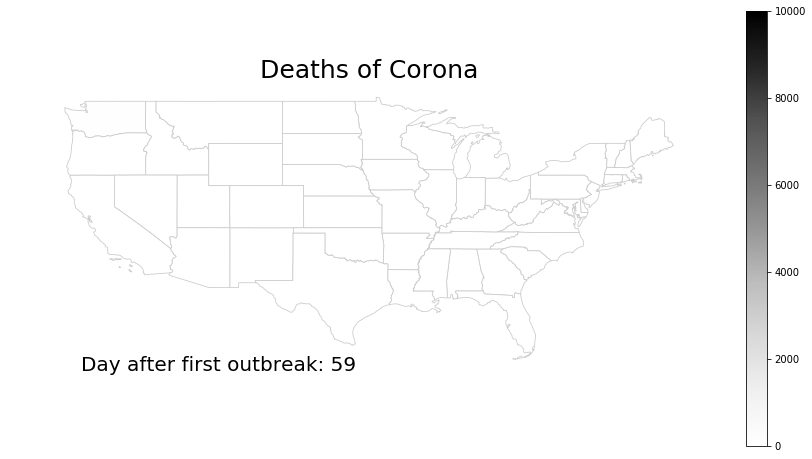

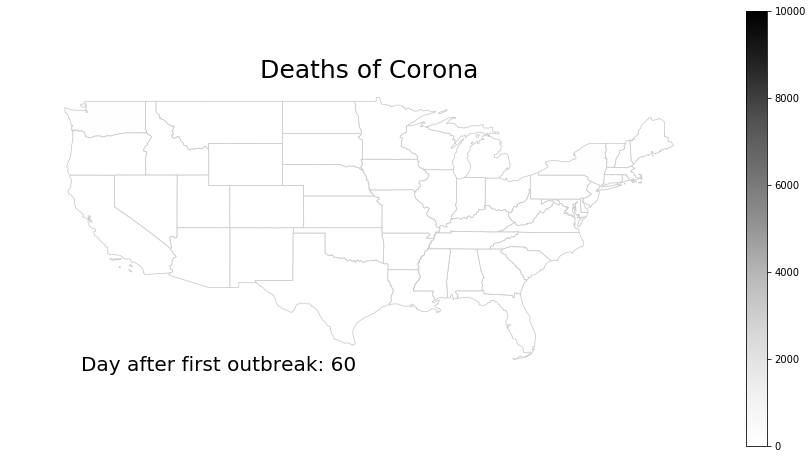

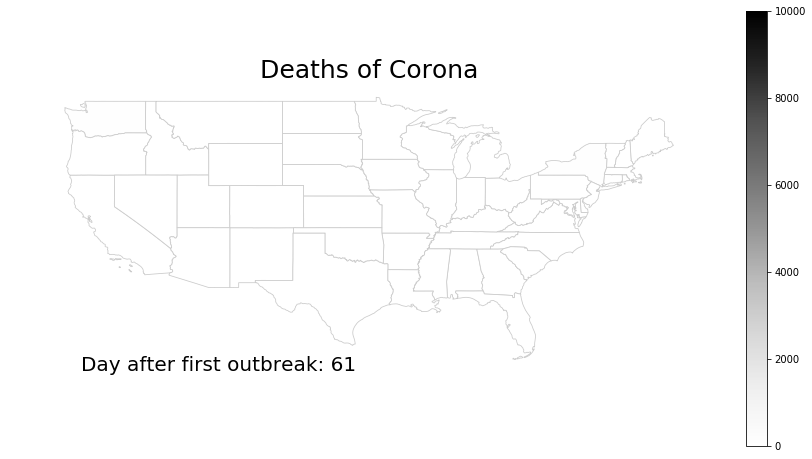

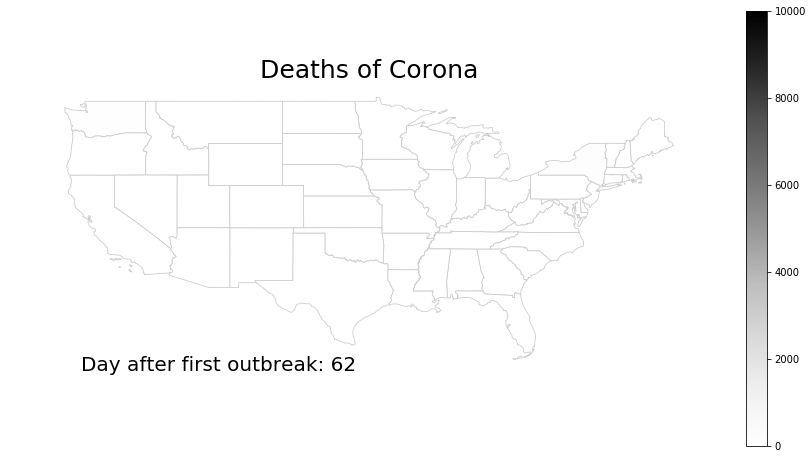

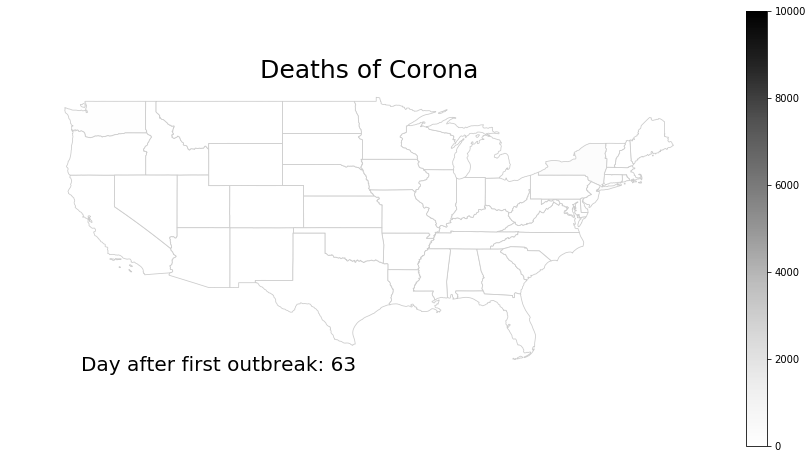

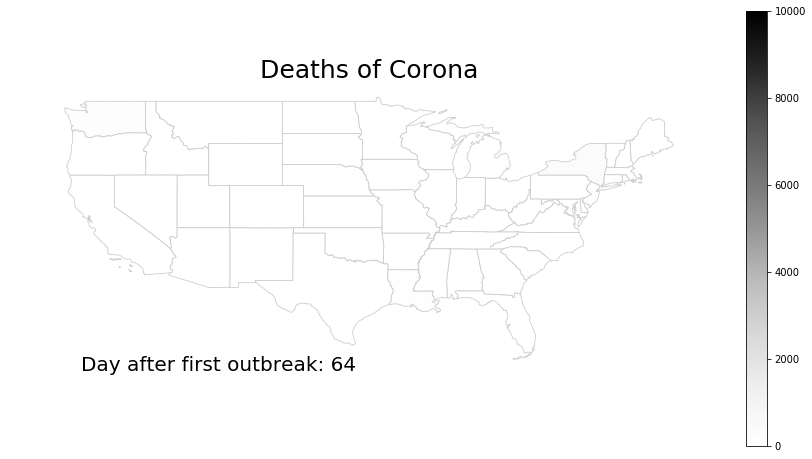

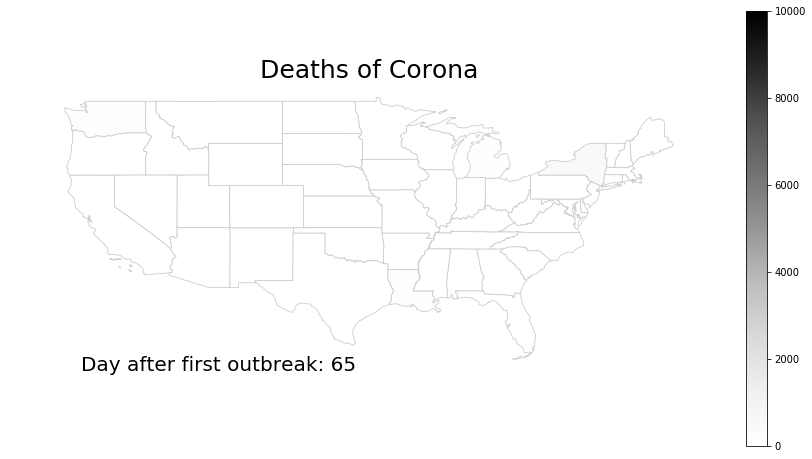

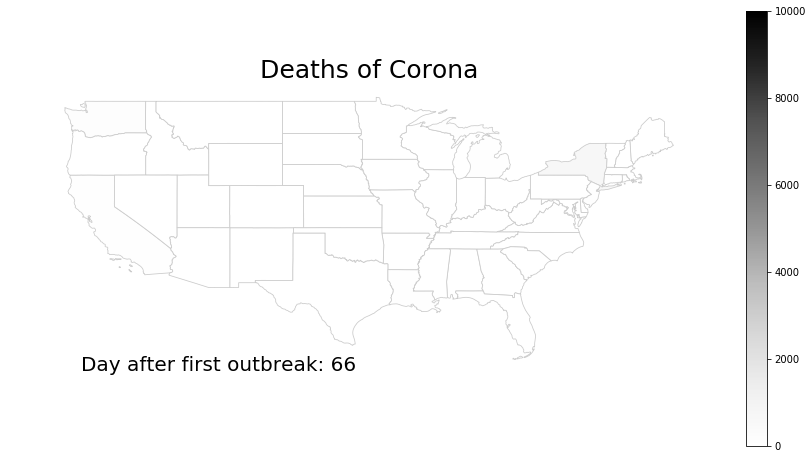

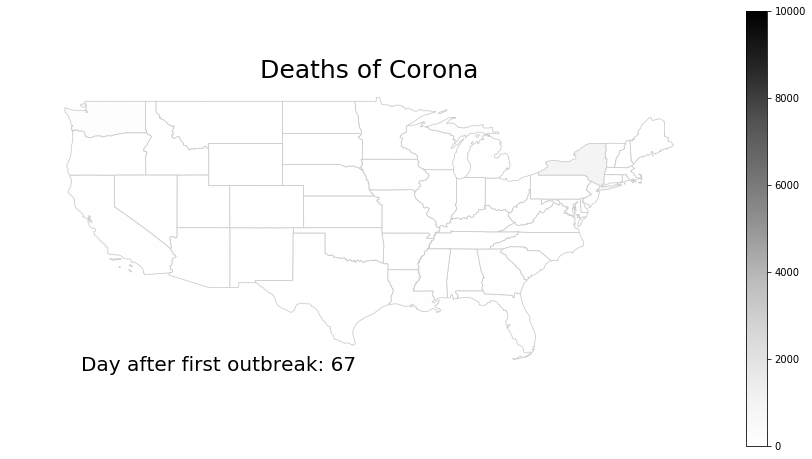

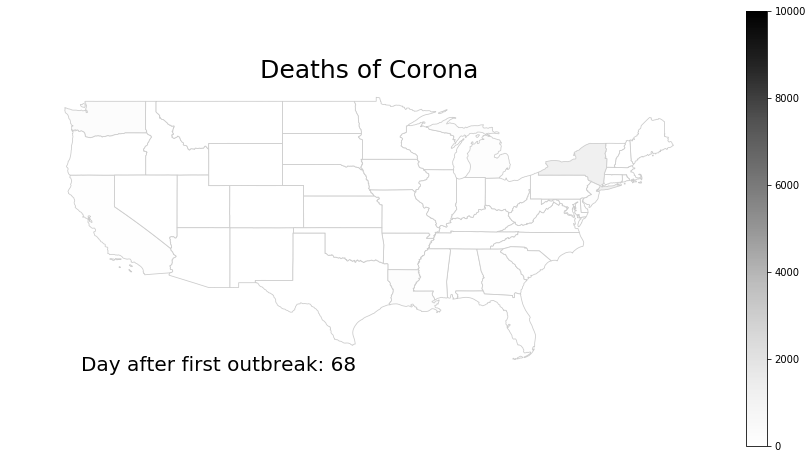

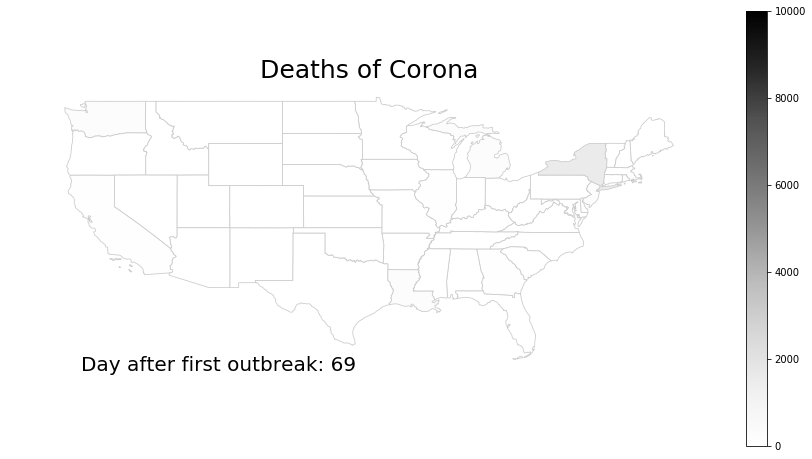

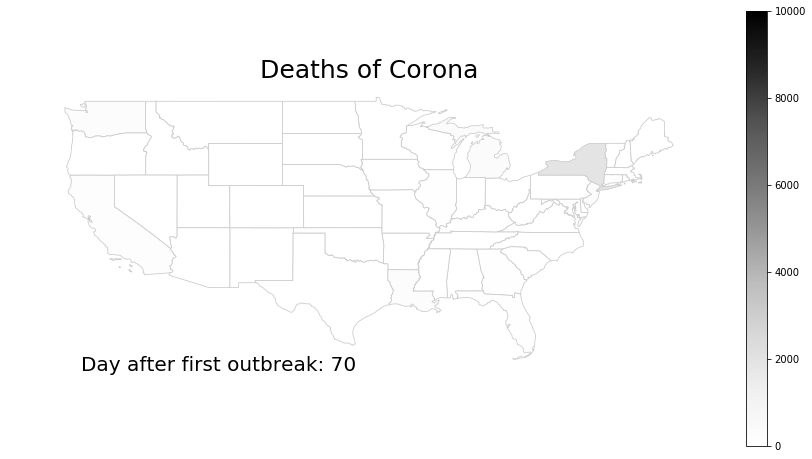

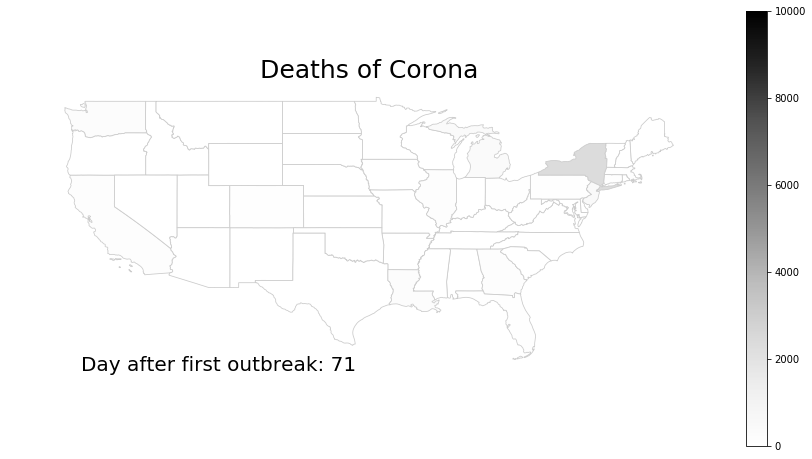

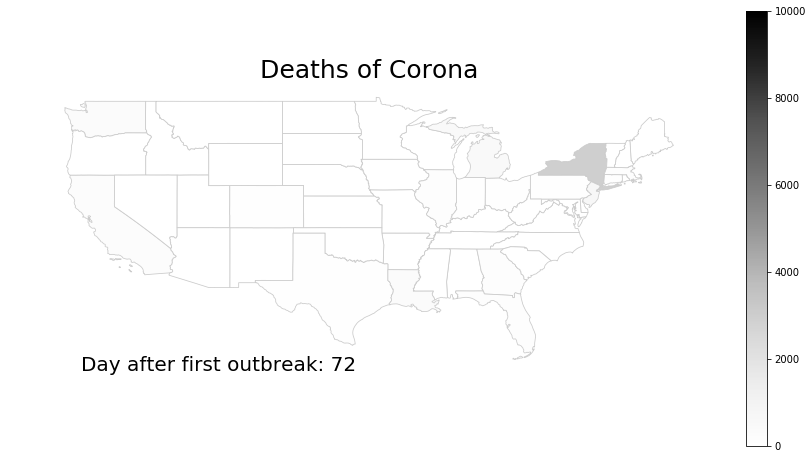

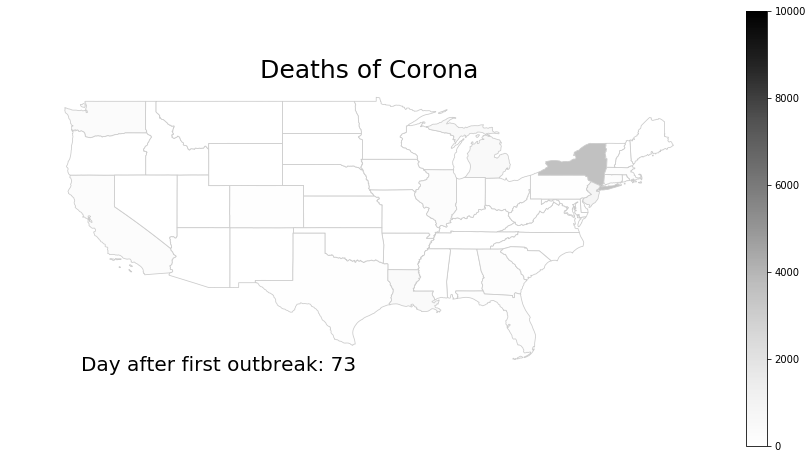

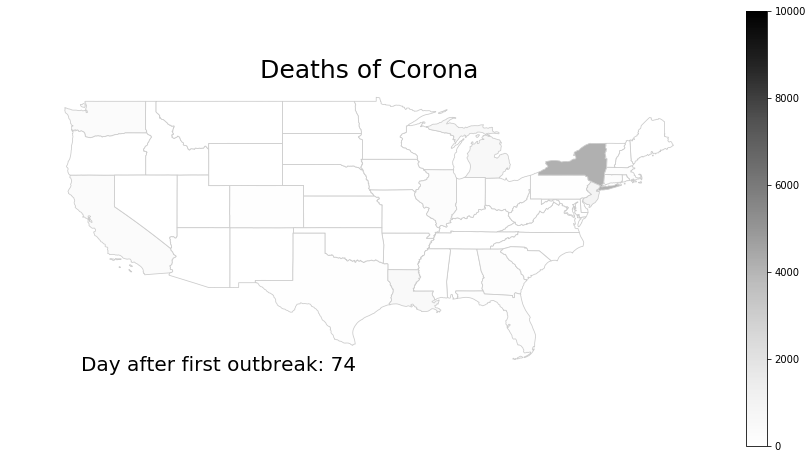

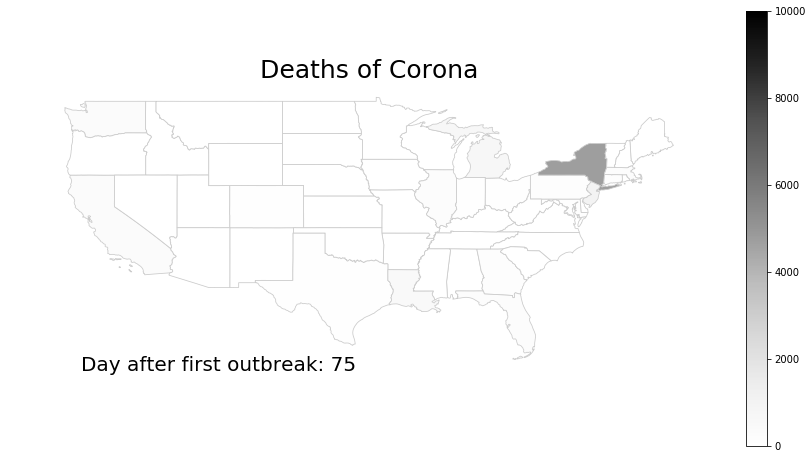

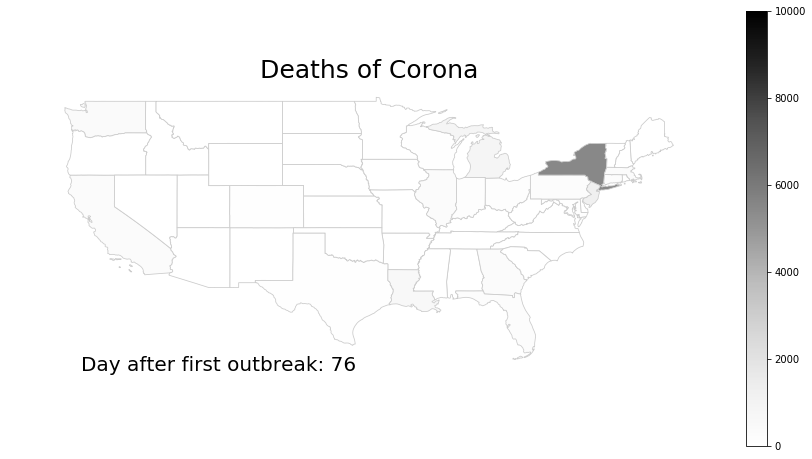

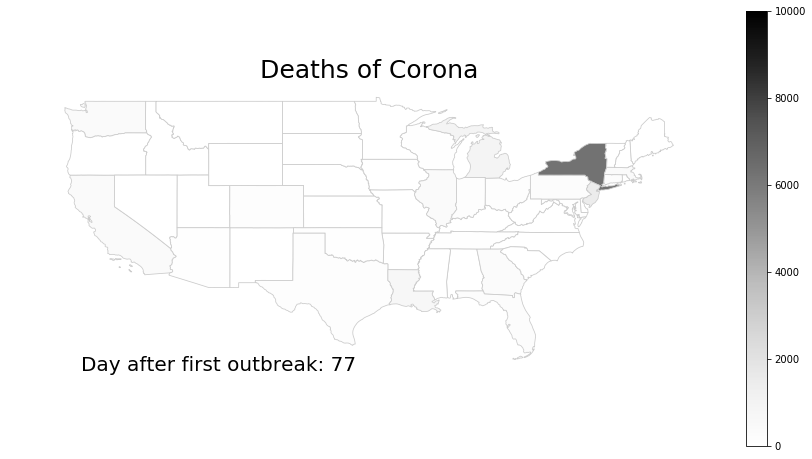

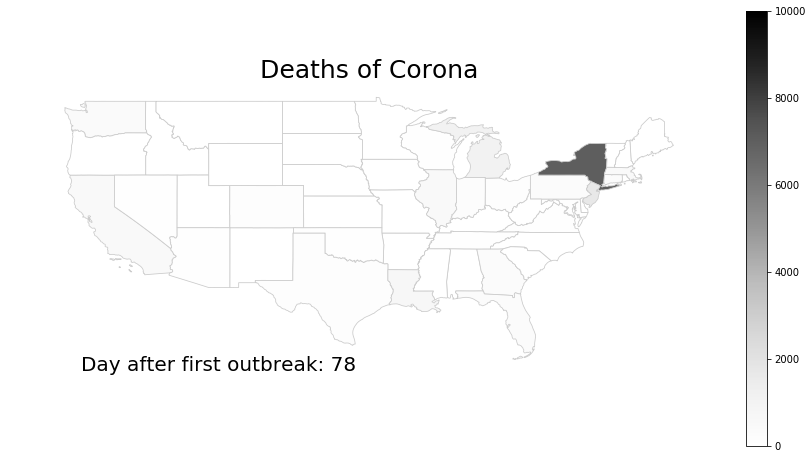

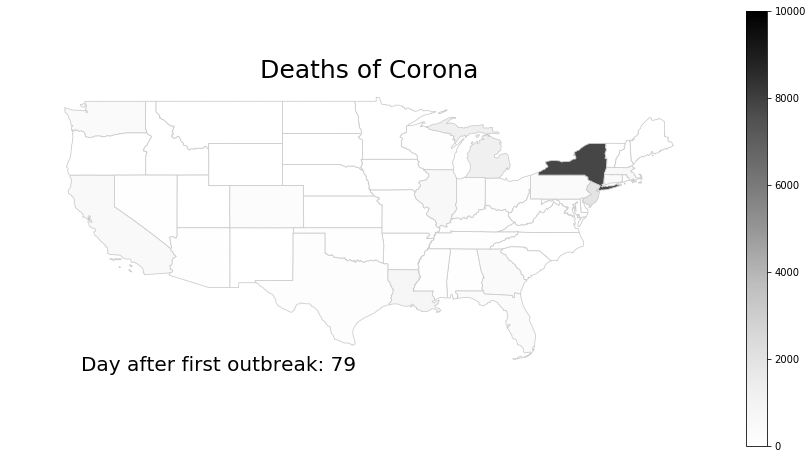

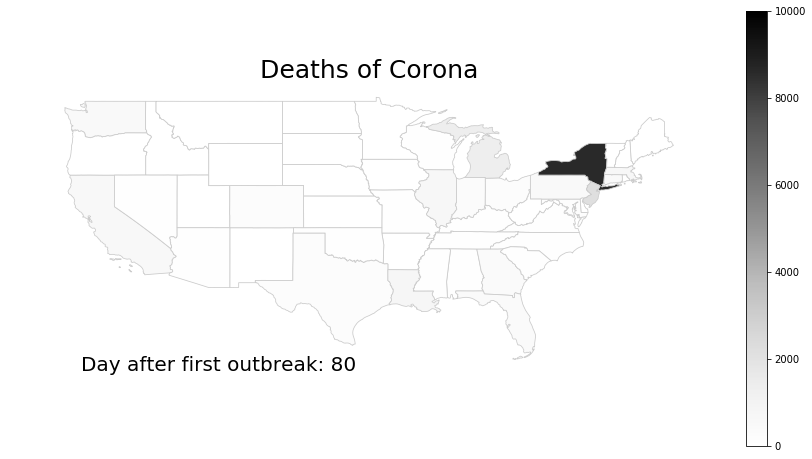

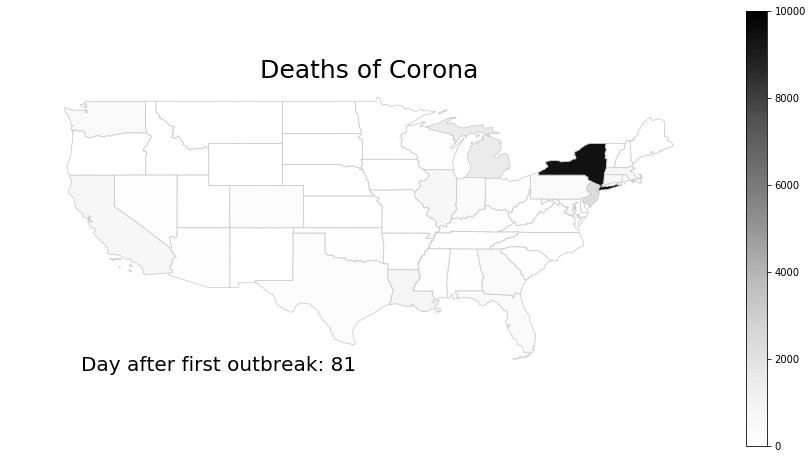

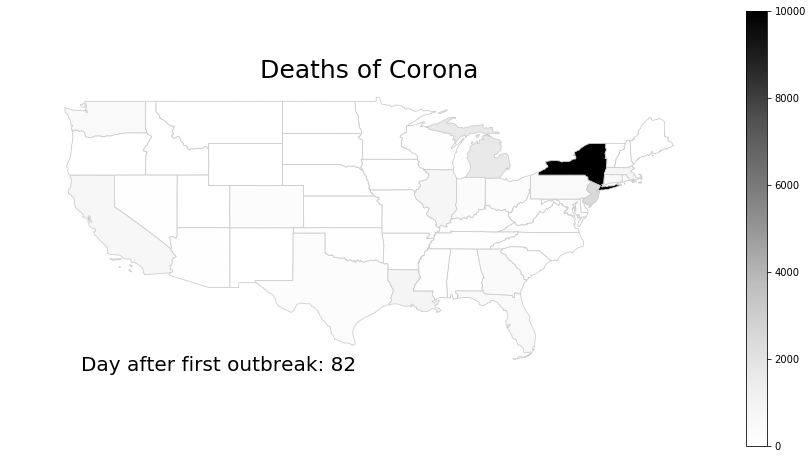

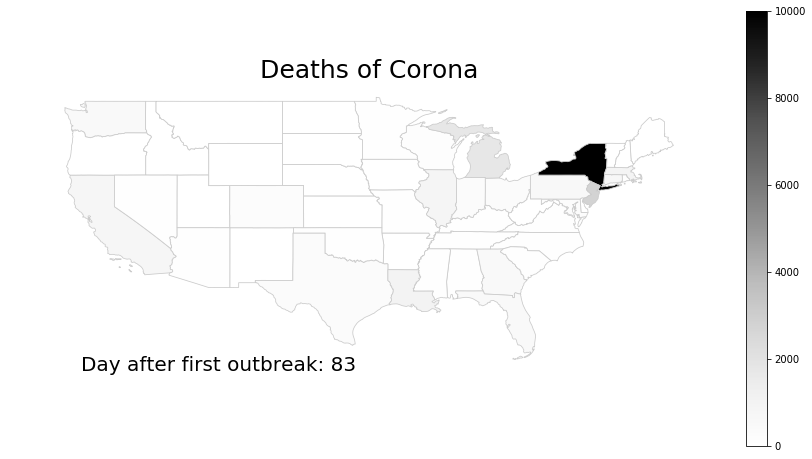

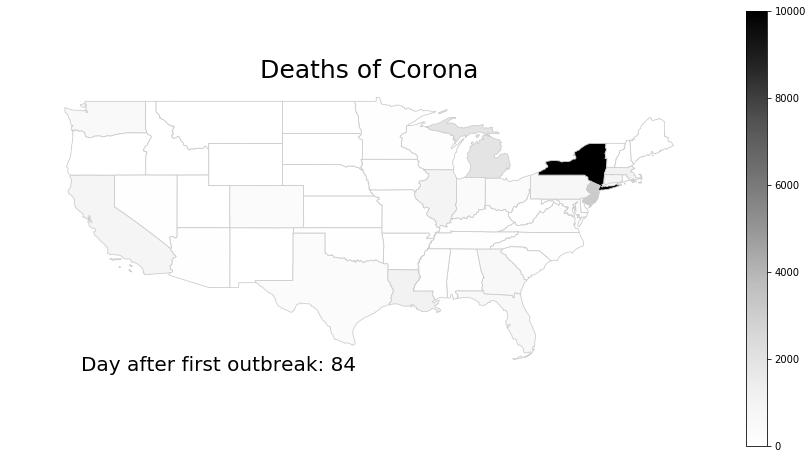

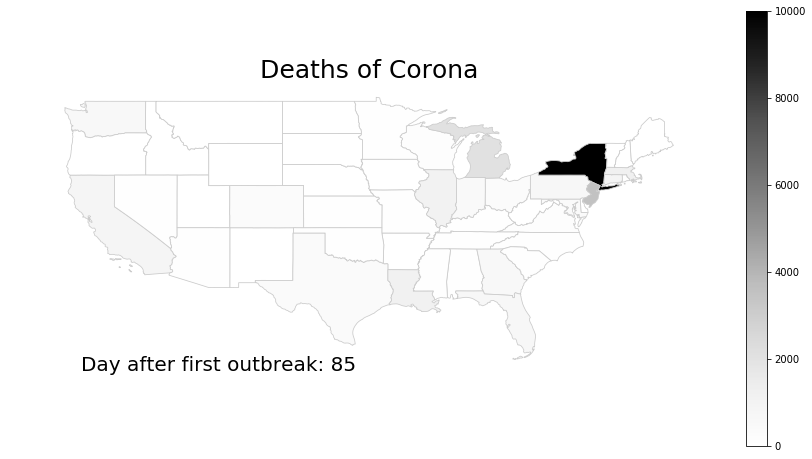

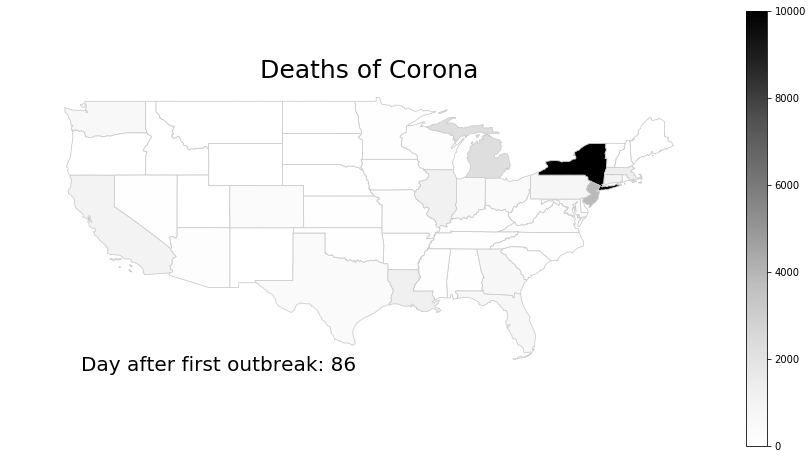

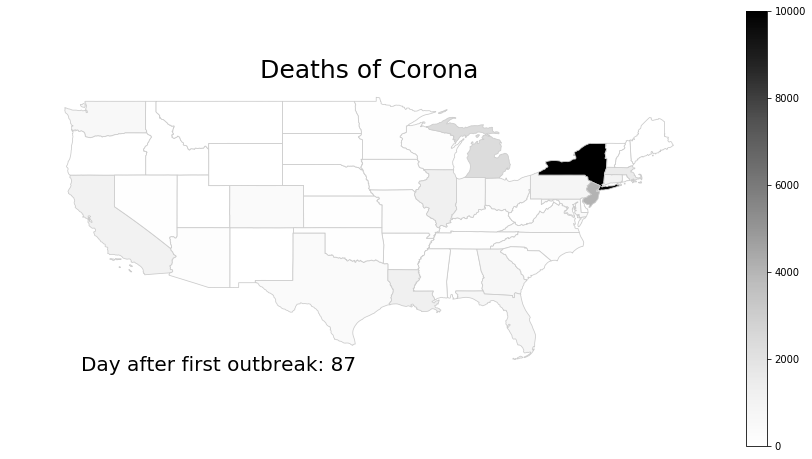

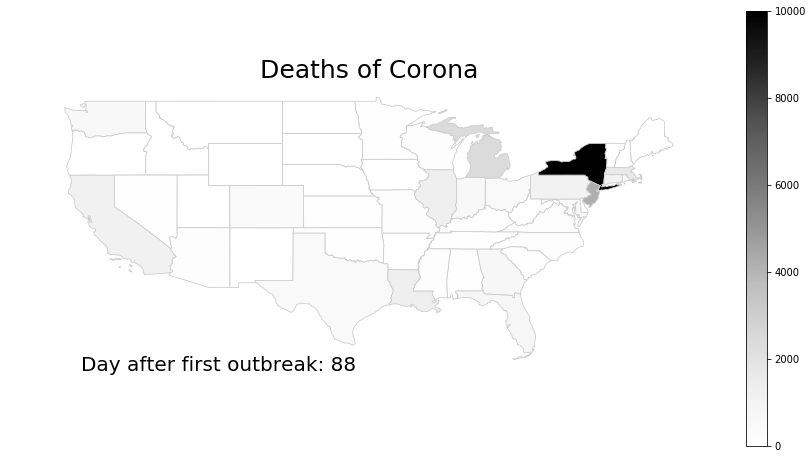

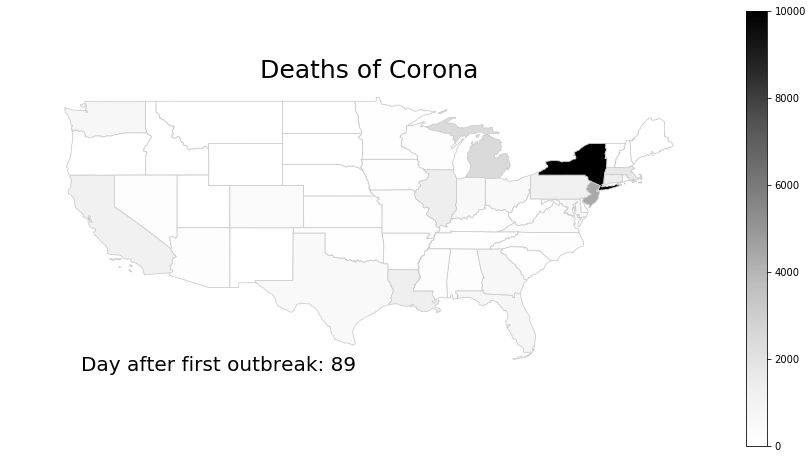

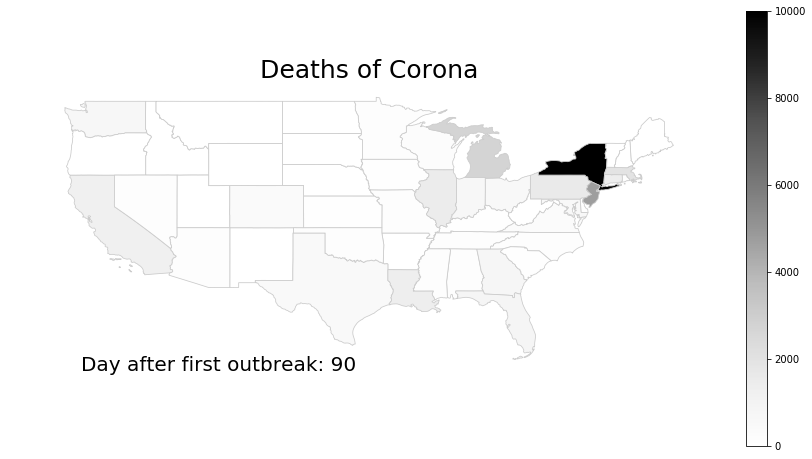

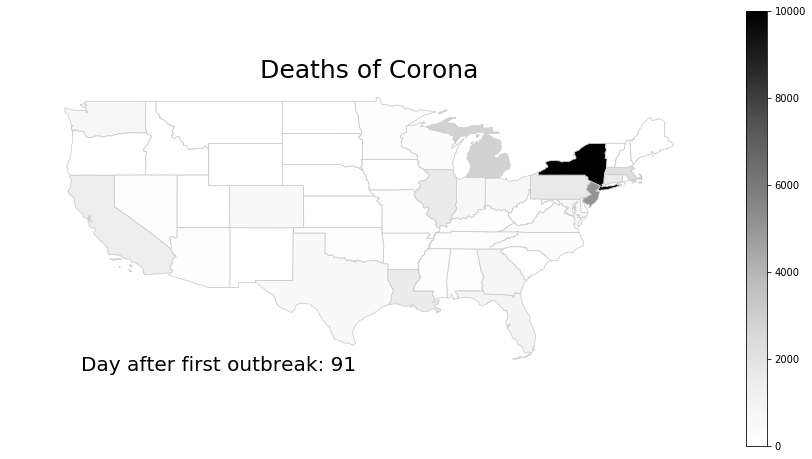

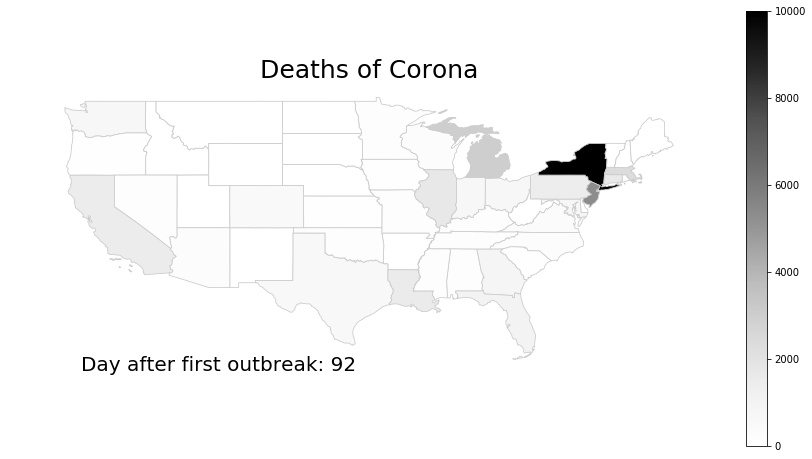

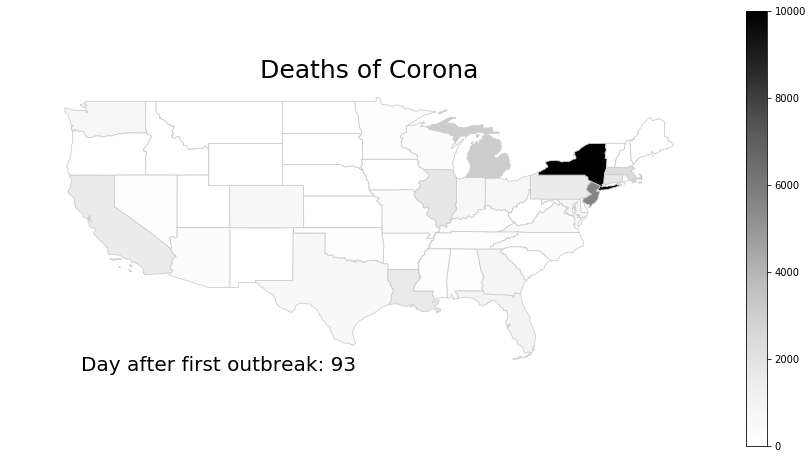

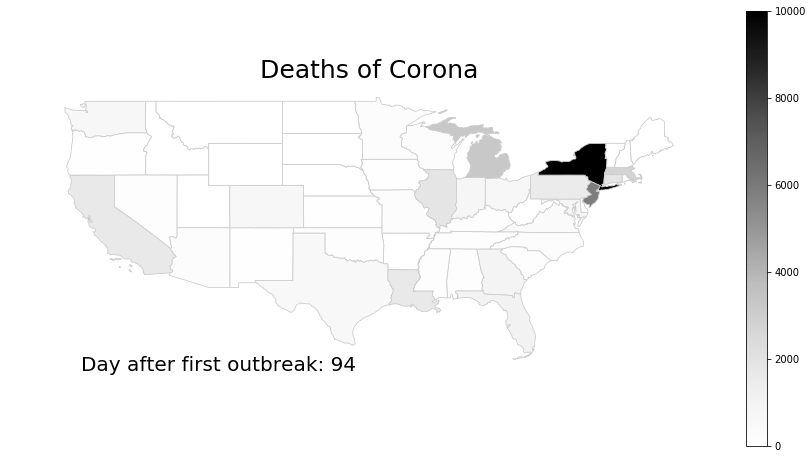

In [30]:
# counter for the for loop
i = 0
output_path = 'charts/' + cat
# set the min and max range for the choropleth map
vmin, vmax = 0, 10000

# start the for loop to create one map per year
for day in list_of_days:
    print(day)
    # create map
    fig = merged.plot(column=day, cmap='Greys', figsize=(15,8), linewidth=0.8, edgecolor='0.8', vmin=vmin, vmax=vmax, 
                       legend=True, norm=plt.Normalize(vmin=vmin, vmax=vmax)) # UDPATE: added plt.Normalize to keep the legend range the same for all maps
    
    # remove axis of chart
    fig.axis('off')
    
    # add a title
    fig.set_title('Deaths of Corona', \
              fontdict={'fontsize': '25'})
    
    # create an annotation for the year

    
    # position the annotation to the bottom left
    fig.annotate('Day after first outbreak: ' + day,
            xy=(0.1, .225), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=20)
    
    # this will save the figure as a high-res png in the output path. you can also save as svg if you prefer.
    filepath = os.path.join(output_path, day + '.png')
    chart = fig.get_figure()
    chart.savefig(filepath, dpi=300)
    

In [32]:
import imageio
images = []
files = os.listdir('charts/'+cat+'/')
# Saving the gif
for filename in list_of_days:
    if filename != '.ipynb_checkpoints':
        images.append(imageio.imread('charts/'+cat+'/' + str(filename)+ '.png'))
for i in range(0,15):
    images.append(imageio.imread('charts/'+cat+'/' + '94' + '.png'))
kargs = { 'duration': 0.2 }
imageio.mimsave('Gifs/'+cat+'.gif', images, 'GIF', **kargs )